## Kaggle competiton - Titanic 
 * Ori Nissim
 * Kaggle profile: https://www.kaggle.com/orinissim 
 

In [ ]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### TL;DR
The competition's about figuring out who will survive the titanic or not by considering all the features given to us and making new features from them.

I will be trying to figure out what features correlate most with the survivle rate and then i will try to make new features from them so the learning will be even better.
The mission was challenging and i helped me learn a lot and made me search for help and find it on my own

### EDA - Essential Data Analysis
Let's understand the data we have:

In [ ]:
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/c/titanic/data")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [ ]:
{"username":"orinissim","key":"0aa1b75ca38d002788da27cf76386715"}

{'key': '0aa1b75ca38d002788da27cf76386715', 'username': 'orinissim'}

In [ ]:
df = pd.read_csv('/content/titanic/train.csv')
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_copy = df.copy()

### Data Dictionary
* Pclass = ticket class - first, second, third, while first the highest and most expensive
* sibsp = # of siblings / spouses aboard the Titanic
* parch = # of parents / children aboard the Titanic

Assuming other features are pretty straight forward

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### So far:
 * we can see average age of a passenger is about 29 y/o
 * this kind of data presentation isnt really useful for us  :)


In [ ]:
# import px and create pie charts for each categorical feature
import plotly.express as px
def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'Sex')
create_pie_chart_of_count(df, 'Pclass')
create_pie_chart_of_count(df, 'SibSp')
create_pie_chart_of_count(df, 'Parch')
create_pie_chart_of_count(df, 'Embarked')

### A little bit better to see the distribution of the data:
* most of the passengers are males - 64.8%
* most of the passengers do not have any parent, child, of sibling on board with them approx. 68 - 76 % 
* The majority of the passengers embarked in South hampton - 72.4%

In [ ]:
# create sunburst charts of the features
df_copy = df.copy()
fig = px.sunburst(df_copy , path=['Sex', 'Parch', 'SibSp', 'Pclass', 'Survived'])
fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
fig.show()


### We can see from this sunburst diagram that most males did not survive and the percent of women survivors is greater

# Correlation between featueres:

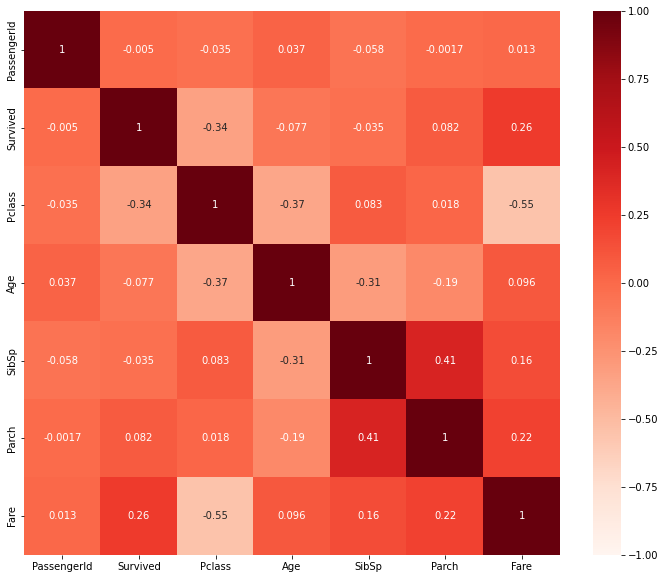

In [ ]:
# show absolute correlation between features in a heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=-1, vmax=1)
plt.show()

## After a quick glance I see there is a good correlation between fare rate and survived passangers, and that there is a good negative relation between Ticket class and surived passangers

## Add new features

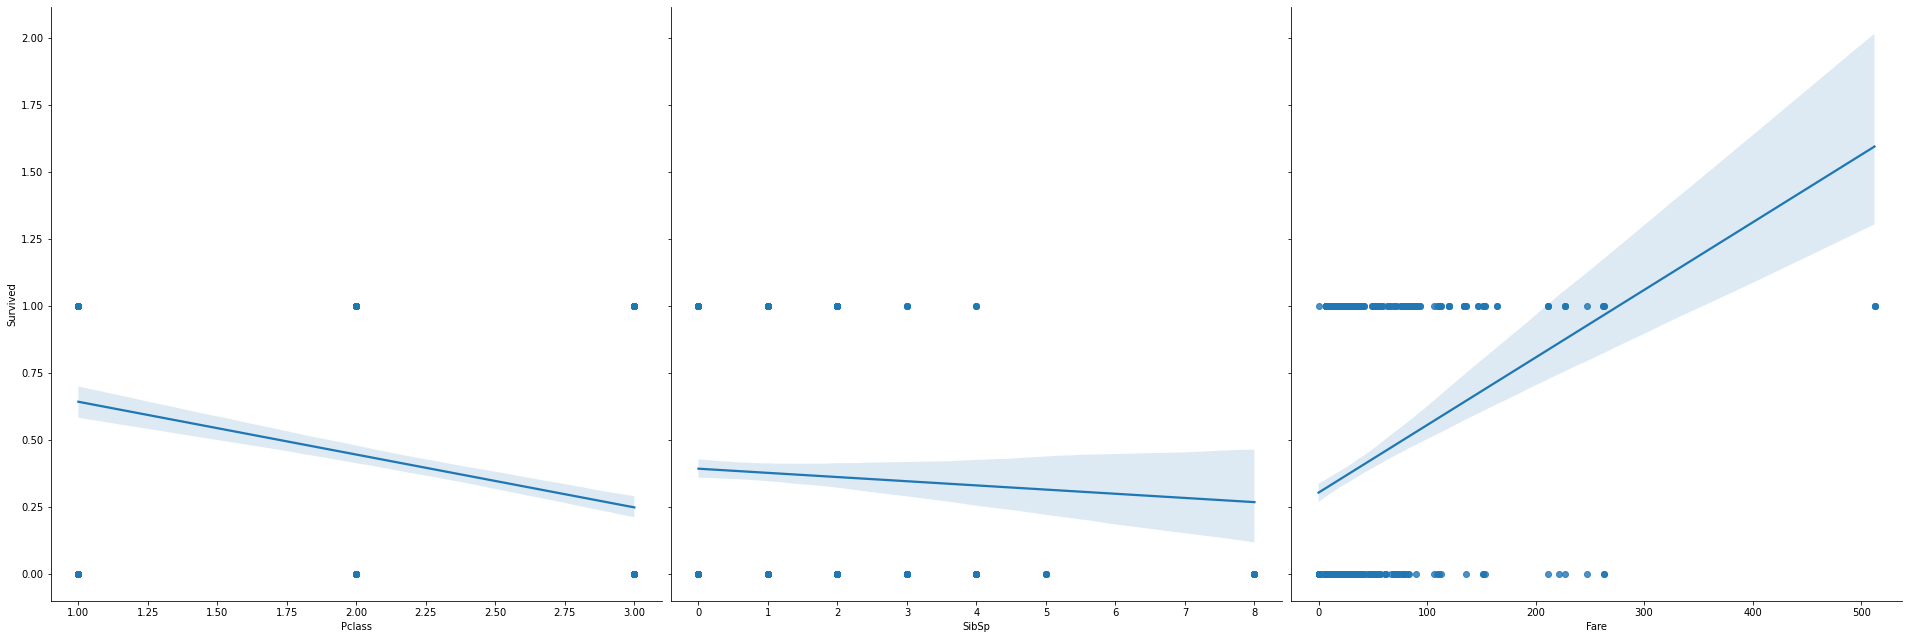

In [ ]:
df_copy = df.copy()
df_copy.insert(column="Family size", value=df["Parch"] + df["SibSp"], loc=1)

sns.pairplot(data=df_copy, palette='pastel', x_vars=[ "Pclass", "SibSp", "Fare"], y_vars=["Survived"], kind="reg", height=9)

## Handle missing values

28.0


Text(0.5, 1.0, 'Missing values heatmap')

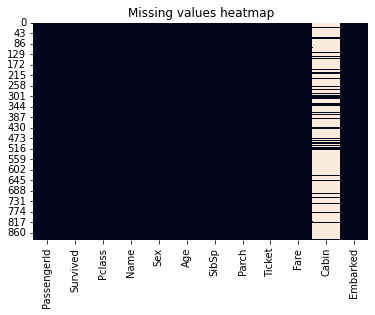

In [ ]:
## calculate mean of passangers age because there are missing datas for some passangers
ages_med = df['Age'].median()
print(ages_med)

df['Age'] = df['Age'].fillna(ages_med)

df.isnull().sum()
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")


### Create a new feature from number of family memebers, change 'sex' to 'isMale', drop the irrelevent cabin 

In [ ]:
df['TravelAlone']=np.where((df["SibSp"]+df["Parch"])>0, 1, 0)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
# remove meaningless parameters

In [ ]:
df['isMale']=np.where((df["Sex"])== 'male', 0, 1)


In [ ]:
df.drop('Sex', axis=1, inplace=True)


In [ ]:
df.drop('Cabin', axis=1, inplace=True)


In [ ]:
df.describe() # after removing and adding features

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,isMale
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,0.397306,0.352413
std,257.353842,0.486592,0.836071,13.019697,49.693429,0.489615,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


## Create ordinal catagories for Logistic Regression model

## split the data

In [ ]:
# final organizations
X = df.copy()
t = df['Survived']

In [ ]:
X = pd.get_dummies(df, columns=["Pclass"])


In [ ]:
X = pd.get_dummies(df, columns=["Embarked"])


In [ ]:
X.drop('Survived', axis=1, inplace=True)
X.drop('Name', axis=1, inplace=True)
X.drop('Ticket', axis=1, inplace=True)


In [ ]:
X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=0.3, random_state=42)


# Let us make a different split and check the result

In [ ]:
X2_train, X2_val, t2_train, t2_val = model_selection.train_test_split(X, t, test_size=0.15, random_state=42)


In [ ]:
display(X_train)

,PassengerId,Pclass,Age,Fare,TravelAlone,isMale,Embarked_C,Embarked_Q,Embarked_S
445,446,1,4.0,81.8583,1,0,0,0,1
650,651,3,28.0,7.8958,0,0,0,0,1
172,173,3,1.0,11.1333,1,1,0,0,1
450,451,2,36.0,27.7500,1,0,0,0,1
314,315,2,43.0,26.2500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
106,107,3,21.0,7.6500,0,1,0,0,1
270,271,1,28.0,31.0000,0,0,0,0,1
860,861,3,41.0,14.1083,1,0,0,0,1
435,436,1,14.0,120.0000,1,1,0,0,1


In [ ]:
display(t_train)

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

## Test our model

In [ ]:
# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

model = LogisticRegression()
model.fit(X_train,t_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# Same model with different data split

In [ ]:
model2 = LogisticRegression()
model2.fit(X2_train,t2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# Models scores:

In [ ]:
model.score(X_train, t_train)

0.7881219903691814

In [ ]:
model2.score(X2_train,t2_train)

0.7859973579920739

### We see this model works better now on the training data, let's test it on unseen data:

In [ ]:
test_prediction = model.predict(X_val)

In [ ]:
model.score(X_val, t_val)

0.7910447761194029

### Seems like it even performed a bit better !

# let's see model2 on validation set

In [ ]:
test_prediction2 = model2.predict(X2_val)
model2.score(X2_val, t2_val)

0.7835820895522388

### Let's try a small change to the weight of the classes

In [ ]:
# The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train,t_train)
model2.score(X_train, t_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7817014446227929

### Let's have a go with MLP 

In [ ]:
# import neural_network and run MLP on the data
from sklearn import neural_network
MLP_cls = neural_network.MLPClassifier(activation='logistic', solver='sgd', alpha=0, max_iter=10000).fit(X_train, t_train)
y_train_prob = MLP_cls.predict_proba(X_train)
y_test_prob = MLP_cls.predict_proba(X_val)
print('Accuracy score on train', MLP_cls.score(X_train, t_train))
print('Accuracy score on test', MLP_cls.score(X_val, t_val))
print()
print('Cross Entropy on train', metrics.log_loss(t_train, y_train_prob))
print('Cross Entropy on test', metrics.log_loss(t_val, y_test_prob))

Accuracy score on train 0.6709470304975923
Accuracy score on test 0.6940298507462687

Cross Entropy on train 0.6294389783762497
Cross Entropy on test 0.628258800171893


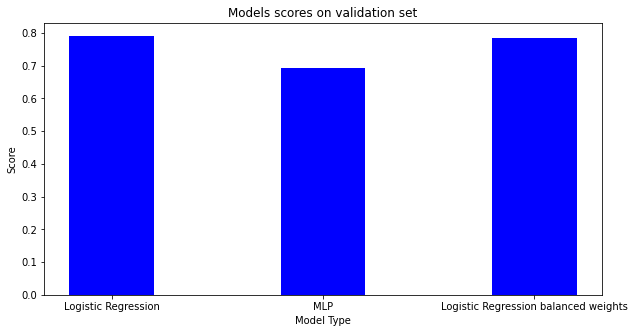

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Logistic Regression':model.score(X_val,t_val), 'MLP':MLP_cls.score(X_val,t_val), 'Logistic Regression balanced weights':model2.score(X_val,t_val) }
models = list(data.keys())
scores = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(models, scores, color ='blue',
		width = 0.4)

plt.xlabel("Model Type")
plt.ylabel("Score")
plt.title("Models scores on validation set")
plt.show()


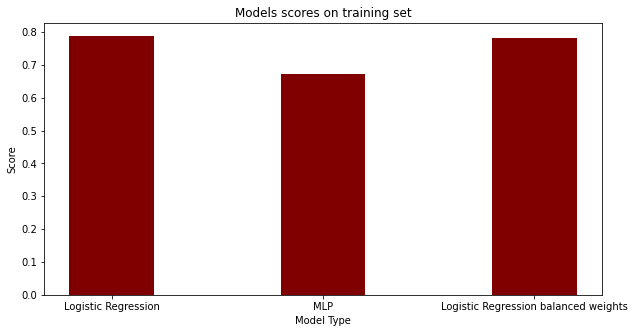

In [ ]:

# creating the dataset
data = {'Logistic Regression':model.score(X_train,t_train), 'MLP':MLP_cls.score(X_train,t_train), 'Logistic Regression balanced weights':model2.score(X_train,t_train) }
models = list(data.keys())
scores = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(models, scores, color ='maroon',
		width = 0.4)

plt.xlabel("Model Type")
plt.ylabel("Score")
plt.title("Models scores on training set")
plt.show()

### We can see the logistic regression model with no changes was the best for us overall

Text(0.5, 1.0, 'Missing values heatmap')

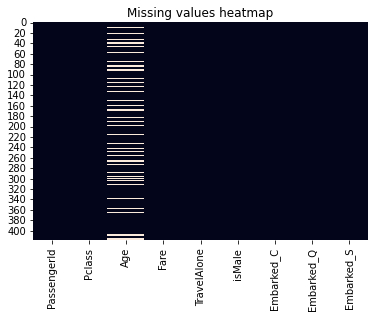

In [ ]:
df_test = pd.read_csv('/content/titanic/test.csv') # read test df and test the model with best score (LR)

df_test['TravelAlone']=np.where((df_test["SibSp"]+df_test["Parch"])>0, 1, 0)
df_test.drop('SibSp', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)
# remove meaningless parameters

df_test['isMale']=np.where((df_test["Sex"])== 'male', 0, 1)
df_test.drop('Sex', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

df_test = pd.get_dummies(df_test, columns=["Embarked"])

df_test.drop('Name', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

sns.heatmap(df_test.isnull(), cbar = False).set_title("Missing values heatmap")


### Handle missing values

Text(0.5, 1.0, 'Missing values heatmap')

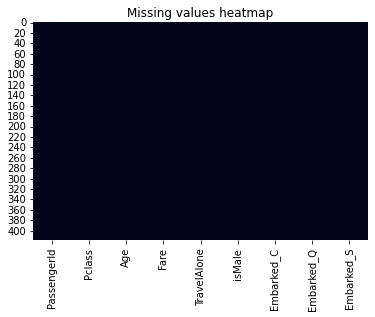

In [ ]:
ages_med = df_test['Age'].median()
df_test['Age'] = df_test['Age'].fillna(ages_med)

fare_med = df_test['Fare'].median()
df_test['Fare'] = df_test['Fare'].fillna(ages_med)

sns.heatmap(df_test.isnull(), cbar = False).set_title("Missing values heatmap")


In [ ]:

output = pd.DataFrame({"PassengerId":df_test.PassengerId, 'Survived': model.predict(df_test)})
output = output.astype({'PassengerId': 'int32'})
output.to_csv('submission.csv', index=False)

### Model's score:

In [ ]:
from IPython.display import Image
#Image(filename='model score.png') exercise 1 submission image

#### Summary
This mission was really fun at first but when i started to understand i didnt even do it the right way and not explained at all i had to start using what we learned in practice and what i could find online to solve the problems i encountered during this mission.
* Improving the models was very hard and thinking of a way to do so
* Also dealing with the graphs wasnt easy
* Understanding what we actually do here and how we do it helped me under it much better


# Exercise 3 starts here
#### I wil start with feature selection followed by building different models such as KNN, Naive bayes classifier and LDA 

# TL;DR
So this exercise was the most interesting for me as it combined all of the knowledge we got through out the course and it also showed me how the scoring of the models I built was very dynamic through out the whole procces yet one model stood out from the rest by having a very consistent and robust result which is the Logistic Regression model with the few tuning I did to it and to the dataset's features.
To conculsion, I enjoyed it a lot and it was going for the most part of it very well for me because i really find this stuff interesting :)

In [ ]:
df3 = df.copy()
df3.describe()

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,isMale
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,32.204208,0.397306,0.352413
std,257.353842,0.486592,0.836071,13.019697,49.693429,0.489615,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000


# Quick fix to missing values

In [ ]:
df3['Age'] = df3['Age'].fillna(ages_med) # fill age column with median value of passenger's ages


Text(0.5, 1.0, 'Missing values heatmap')

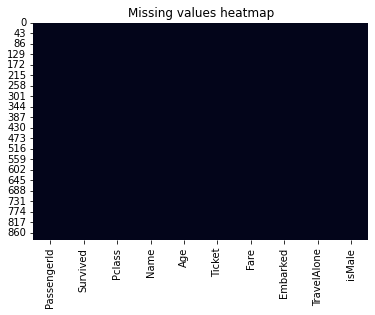

In [ ]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")


In [ ]:
df["Embarked"] = df.groupby("Survived")["Embarked"].apply(lambda x: x.fillna(x.mode().iat[0]))


Text(0.5, 1.0, 'Missing values heatmap')

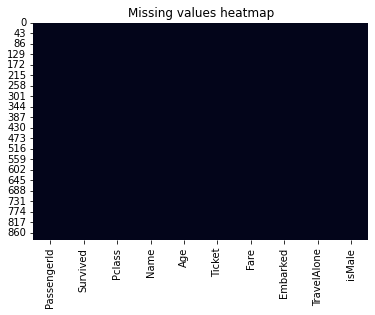

In [ ]:
sns.heatmap(df.isnull(), cbar = False).set_title("Missing values heatmap")


# I will first try grid search on a logistic regression model because it gave us the best score on exercise 1

In [ ]:
X3_train, X3_val, t3_train, t3_val = model_selection.train_test_split(X, t, test_size=0.3, random_state=42)

## Reminder: the best score we got for training was 0.7910447761194029 in exercise 1

In [ ]:
lr = LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

# Grid search for Logistic regression

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":[ 'none' ,"l2"]}   # l1 lasso depricated so only l2 ridge


clf = GridSearchCV(lr, param_grid = grid, cv = 5, verbose=2, n_jobs=-1)

classifier = clf # for further use
# Fit on data
clf.fit(X_train, t_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['none', 'l2']},
             verbose=2)

In [ ]:
clf.score(X_train, t_train)

0.7929373996789727

# A little bit better on the same training set

## Recursive feature selection with cross-validation

In [ ]:
from sklearn.feature_selection import RFECV 
 

In [ ]:
rfecv = RFECV(estimator=lr,n_jobs=-1,cv=5)

In [ ]:
rfecv.fit(X3_train,t3_train)   # train on unmodified dataset - X3_train that we made above

RFECV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1)

In [ ]:
rfecv.score(X3_train,t3_train) 

0.7913322632423756

# That is all folks let's save the features we got

In [ ]:
x_train_mod = rfecv.transform(X3_train)

In [ ]:
clf2 = GridSearchCV(lr, param_grid = grid, cv = 5, verbose=2, n_jobs=-1)

clf2.fit(x_train_mod,t_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning:

Setting penalty='none' will ignore the C and l1_ratio parameters



GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['none', 'l2']},
             verbose=2)

In [ ]:
clf2.score(x_train_mod,t_train)

0.7929373996789727

# After having fun with this model its time to try other models such as KNN and NBC

# Knn
classifier that works in a way that each row on the data set is compared to the K closest rows, features value wise, and labels it like it's 'neighboors'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
# no params because default is good enough for us with it's optimizing methods such as the algorithm used to compute the nearest neighbors is set to auto
# by defualt ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.




In [ ]:
knn.fit(x_train_mod,t_train)

KNeighborsClassifier()

In [ ]:
knn.score(x_train_mod,t_train)

0.8202247191011236

# Great! we finally got through the 0.8 glass cielling

## A try with grid search on how many neighbors we should pick

In [ ]:
knn2= KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn2, param_grid, cv=10 ,verbose=1)

grid.fit(x_train_mod,t_train)
grid.score(x_train_mod,t_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


0.8202247191011236

In [ ]:
grid.best_params_

{'n_neighbors': 5}

## What about Naive Bayes Classifier?

In [ ]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()

cnb.fit(x_train_mod,t_train)
cnb.score(x_train_mod,t_train)

0.8089887640449438

# Altough it wasnt on the instruction but let's give a shot to decision trees because it might work well for our task and on this *dataset*
what lead me here was that the datasets consists of some high informatino data such as age and gender and we could obiously see that younger people, kids, and females were much more likely to survive so a decision tree looked very fit for the job in my opinion

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:

depth_range = list(range(10, 200))

param_grid_dtc = {'criterion': ["gini", "entropy", "log_loss"],
                  'max_depth': depth_range
                  }

# defining parameter range
dtc_grid = GridSearchCV(dtc, param_grid_dtc, cv=10, verbose=1)

dtc_grid.fit(x_train_mod,t_train)


In [ ]:
dtc_grid.score(x_train_mod,t_train)

0.9245585874799358

## Best score so far - 0.898

# Let's see how these model preform on validation set

In [ ]:
# prepare arrays for further use in graphs presentation of the data
models_array = {'Logistic Regression', 'Decision Trees' , 'Naive Bayes','KNN'}
model_scores_train = { dtc_grid.score(x_train_mod,t_train),clf2.score(x_train_mod,t_train),cnb.score(x_train_mod,t_train),knn.score(x_train_mod,t_train)}
model_scores_train

{0.7929373996789727,
 0.8089887640449438,
 0.8202247191011236,
 0.9245585874799358}

### Prepare validtion data so it will contain only the best features we found earlier

In [ ]:
x_validation_mod = rfecv.transform(X3_val)

### The line below will not run because X3 has too many features, this is a demostration to show that we actually removed features

In [ ]:
#dtc_grid.score(X3_val,t3_val) #  X has 9 features, but DecisionTreeClassifier is expecting 7 features as input.

In [ ]:
dtc_grid.score(x_validation_mod,t3_val)

0.7649253731343284

In [ ]:
model_scores_validation = { dtc_grid.score(x_validation_mod,t3_val),clf2.score(x_validation_mod,t3_val),cnb.score(x_validation_mod,t3_val),knn.score(x_validation_mod,t3_val)}
model_scores_validation

{0.7350746268656716, 0.753731343283582, 0.7649253731343284, 0.7947761194029851}

#### For the record i havent tried different hyper parameters, different sub groups of features in a SPECIFIC section of the notebook because that is made every time we set up a grid search and in the RFECV model above :)))


## Now we have all scores, let's compare the models we used

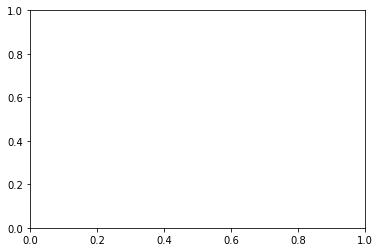

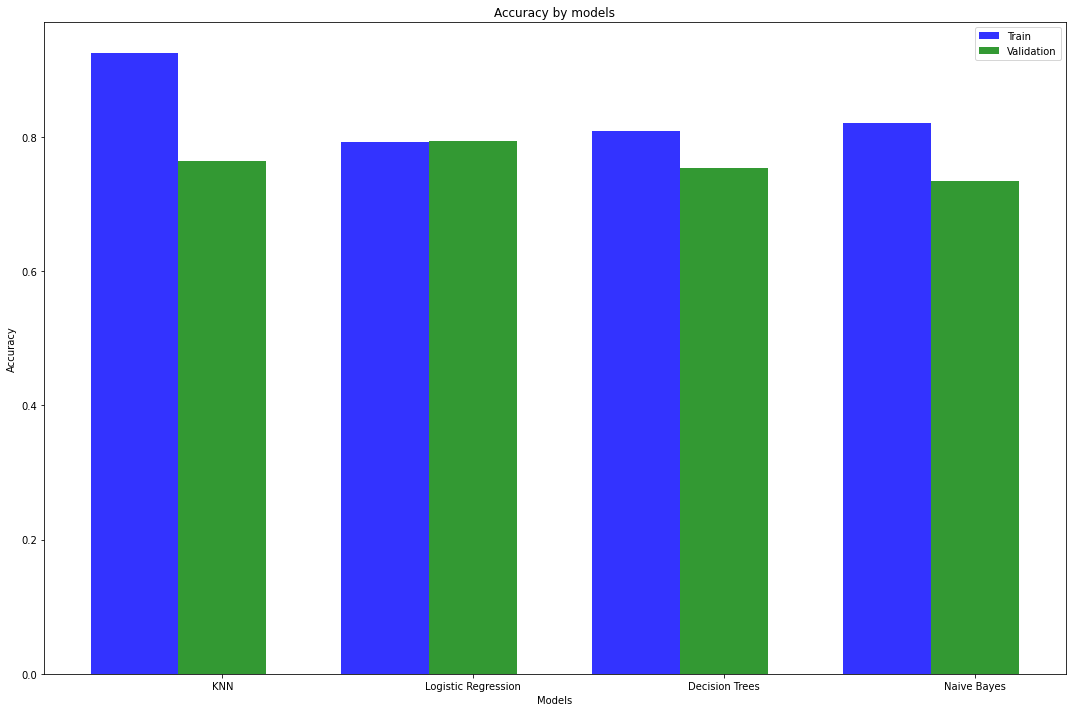

In [ ]:
n_groups = 4

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

plt.figure(figsize=(15,10))

rects1 = plt.bar(index, model_scores_train, bar_width,
alpha=opacity,
color='b',
label='Train')

rects2 = plt.bar(index + bar_width, model_scores_validation, bar_width,
alpha=opacity,
color='g',
label='Validation')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by models')
plt.xticks(index + bar_width, models_array)
plt.legend()

plt.tight_layout()
plt.show()

# **KNN and decision trees model swapped places and somehow i cannot fix it so consider the graph not correct at first glance!!!!!!!!!!!**

# Plotting the Confusion Matrices for the best model

### Training data

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred = cross_val_predict(dtc_grid, x_train_mod, t3_train, cv=5)
conf_mat = confusion_matrix(t3_train, y_pred)

In [ ]:
conf_mat

array([[342,  50],
       [ 83, 148]])

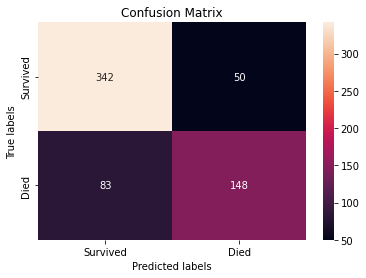

In [ ]:
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Survived', 'Died']); ax.yaxis.set_ticklabels(['Survived', 'Died']);


### Validation data

In [ ]:

y_pred_val = cross_val_predict(dtc_grid, x_validation_mod, t3_val, cv=5)
conf_mat_val = confusion_matrix(t3_val, y_pred_val)


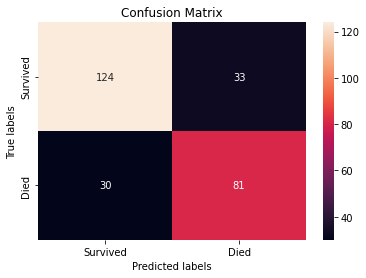

In [ ]:

ax= plt.subplot()
sns.heatmap(conf_mat_val, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Survived', 'Died']); ax.yaxis.set_ticklabels(['Survived', 'Died']);


## Calculating KPI's

In [ ]:
# train kpi's
[tp , fp , fn , tn] = conf_mat.flatten()

# validation kpi's
[tp1 , fp1 , fn1 , tn1] = conf_mat_val.flatten()


print(f"{tp}\n{fp}\n{fn}\n{tn}\n")
print(f"{tp1}\n{fp1}\n{fn1}\n{tn1}\n")

342
50
83
148

124
33
30
81



## Define a function for KPI's printing

In [ ]:
def printMetrics(model,set_type, tp, fp, fn, tn):
  accuracy= (tp + tn) / (tp + tn + fn + fp)
  specifity= tn / (tn + fp)
  precision= tp / (tp + fp)
  recall= tp / (tp + fn)

  print(f"Model: {model}, Set: {set_type}\nAccuracy: {accuracy}\nSpecifity: {specifity}\nPrecision: {precision}\nRecall: {recall}\n")

In [ ]:
printMetrics("Decision Tree Classifier","Training", tp, fp, fn, tn)

Model: Decision Tree Classifier, Set: Training
Accuracy: 0.7865168539325843
Specifity: 0.7474747474747475
Precision: 0.8724489795918368
Recall: 0.8047058823529412



In [ ]:
printMetrics("Decision Tree Classifier","Validation", tp1, fp1, fn1, tn1)

Model: Decision Tree Classifier, Set: Validation
Accuracy: 0.7649253731343284
Specifity: 0.7105263157894737
Precision: 0.7898089171974523
Recall: 0.8051948051948052



### By looking at these values we can see the model preform pretty well on the data even though it does make a mistake it is not too large and it can predict the right outcome most of the times

# Loss graphs 

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
loss = log_loss(t3_train, dtc_grid.predict(x_train_mod))

In [ ]:
predictions = dtc_grid.predict(x_train_mod)
index = np.arange(len(t3_train))
loss = np.zeros(len(t3_train))


In [ ]:
for i in range(len(index)):
  label = t3_train[i]
  prediction = predictions[i]
  loss[i] = -( label * np.log(prediction) + (1-label) * np.log(1-prediction) )

### For some reason something is being divided by zero and i cant figure it out 

# I will submit 2 model to see how they preform on test data
* Logistic regression - because it was the most robust model and preformed pretty well on both validation and training set without much differece
* Decision Tree classifier - received highest score so why not ?

In [ ]:
df_test_transformed = rfecv.transform(df_test)  # remove unnecessary features from test set

### Logistic regression model

In [ ]:
output = pd.DataFrame({"PassengerId":df_test.PassengerId, 'Survived': clf2.predict(df_test_transformed)})
output = output.astype({'PassengerId': 'int32'})
output.to_csv('submission_logistic_regression.csv', index=False)

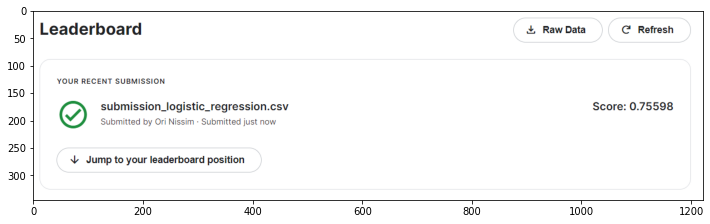

In [ ]:
from matplotlib.image import imread
img = plt.imread('/content/LR_submission.png')
plt.figure(figsize=(12,10))
plt.imshow(img)

### Decision Trees model

In [ ]:
output = pd.DataFrame({"PassengerId":df_test.PassengerId, 'Survived': dtc_grid.predict(df_test_transformed)})
output = output.astype({'PassengerId': 'int32'})
output.to_csv('submission_decision_trees.csv', index=False)

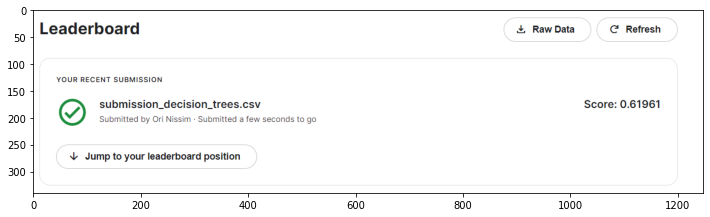

In [ ]:
img2 = plt.imread('/content/DT_submission.png')
plt.figure(figsize=(12,10))
plt.imshow(img2)